# Importación de datos y librerías

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [9]:
df_bmw = pd.read_csv(r"C:\Users\Silvia\Downloads\BMW data preparation project\bmw_pricing_v3.csv")

In [10]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [11]:
#podemos ver que no tenemos filas duplicadas
df_bmw[df_bmw.duplicated(keep = False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


# Paso 1. Columnas eliminadas
¿Qué columnas eliminaron inicialmente del dataset y por qué?


> *R: Inicialmente podemos ver que hay una columna llamada 'marca' que no tiene mucho sentido ya que la base de datos es de la marca BMW, por si acaso vemos los valores que se encuentran dentro, y efectivamente solo existe un tipo de dato llamado 'bmw' así que la eliminamos*



In [12]:
df_bmw1 = df_bmw.copy()

In [13]:
#La columna 'marca' no tiene sentido ya que la base de datos es de BMW, pero para asegurarnos haremos la siguiente función
df_bmw1['marca'].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [14]:
del df_bmw1['marca']

# Paso 2 Nulos

Manejo de nulos, explicar qué se hizo con los nulos por cada columna



> *R: primero observé que la mayoría de columnas tenía un
porcentaje muy bajo de nulos (menos de un 0.2%), por lo que decidí eliminar esos nulos ya que al ser un porcentaje tan bajo no debería de afectar al modelo. Una vez eliminado solo nos quedaban 7 columnas con nulos, ninguna de ellas númericas. Así que he decidido sustituir los nulos por un 'sin datos' a excepción de la columna asientos_traseros_plegables que al tener un 70% de los datos nulos, no creo que pueda aportarnos una muestra suficientemente significativa así que he eliminado esa columna*



##Columnas con nulos que constituyan menos de un 0.2%

In [15]:
df_bmw2 = df_bmw1.copy()

In [16]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

In [17]:
#Vemos el porcentaje de nulos que hay en cada columna
df_bmw2.isnull().sum() / len(df_bmw2) * 100

modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [18]:
#Observamos que la mayoría de columnas tienen un porcentaj menor al 0.2% de nulos,
#por lo que si eliminamos los nulos de esas columnas apenas afectaría al modelo

for i in df_bmw2:
  if (df_bmw2[i].isnull().sum() / len(df_bmw2) * 100) < 0.2:
    df_bmw2.dropna(subset=[i], inplace = True)

In [19]:
#comprobamos
df_bmw2.isnull().sum() / len(df_bmw2) * 100

modelo                          0.000000
km                              0.000000
potencia                        0.000000
fecha_registro                 50.010380
tipo_gasolina                   0.000000
color                           9.175836
tipo_coche                     30.080963
volante_regulable               0.000000
aire_acondicionado             10.006228
camara_trasera                  0.000000
asientos_traseros_plegables    70.022836
elevalunas_electrico            0.000000
bluetooth                      15.050862
gps                             0.000000
alerta_lim_velocidad           15.050862
precio                          0.000000
fecha_venta                     0.000000
dtype: float64

## De fechas a años

In [20]:
fecha_list = df_bmw2['fecha_registro'].str.split("-", expand=True)

In [21]:
fecha_list2 = df_bmw2['fecha_venta'].str.split("-", expand=True)

In [22]:
for i in fecha_list:
  df_bmw2['fecha_registro_' + str(i)] = fecha_list[i]

In [23]:
for i in fecha_list2:
  df_bmw2['fecha_venta_' + str(i)] = fecha_list2[i]

In [24]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4817 non-null   object 
 1   km                           4817 non-null   float64
 2   potencia                     4817 non-null   float64
 3   fecha_registro               2408 non-null   object 
 4   tipo_gasolina                4817 non-null   object 
 5   color                        4375 non-null   object 
 6   tipo_coche                   3368 non-null   object 
 7   volante_regulable            4817 non-null   object 
 8   aire_acondicionado           4335 non-null   object 
 9   camara_trasera               4817 non-null   object 
 10  asientos_traseros_plegables  1444 non-null   object 
 11  elevalunas_electrico         4817 non-null   object 
 12  bluetooth                    4092 non-null   object 
 13  gps                    

**Sustituimos los nulos de la columna fecha_registro_ por la mediana**

In [25]:
df_bmw2['fecha_registro_0'].fillna(df_bmw2['fecha_registro_0'].median(), inplace = True)

In [26]:
df_bmw2['año_registro'] = df_bmw2['fecha_registro_0'].astype(int)

In [27]:
df_bmw2['año_venta'] = df_bmw2['fecha_venta_0'].astype(int)

In [28]:
del df_bmw2['fecha_registro']
del df_bmw2['fecha_registro_0']
del df_bmw2['fecha_registro_1']
del df_bmw2['fecha_registro_2']

del df_bmw2['fecha_venta']
del df_bmw2['fecha_venta_0']
del df_bmw2['fecha_venta_1']
del df_bmw2['fecha_venta_2']

In [29]:
df_bmw2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,año_registro,año_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2012,2018
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2013,2018
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2012,2018
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2013,2018
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2013,2018


## color                           

In [30]:
df_bmw2['color'].value_counts()

color
black     1489
grey      1067
blue       643
white      480
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [31]:
df_bmw2['color'].fillna('sin datos', inplace = True)

In [32]:
df_bmw2['color'].isnull().sum()

0

## tipo_coche  

In [33]:
df_bmw2['tipo_coche'].value_counts()

tipo_coche
estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64

In [34]:
df_bmw2['tipo_coche'].fillna('sin datos', inplace = True)

In [35]:
df_bmw2['tipo_coche'].isnull().sum()

0

## aire_acondicionado  

In [36]:
df_bmw2['aire_acondicionado'].value_counts()

aire_acondicionado
True     3449
False     886
Name: count, dtype: int64

In [37]:
df_bmw2['aire_acondicionado'].fillna('sin datos', inplace = True)

In [38]:
df_bmw2['aire_acondicionado'].isnull().sum()

0

## asientos_traseros_plegables

In [39]:
#tiene un 70% de nulos. Muestra no significativa

del df_bmw2['asientos_traseros_plegables']

In [40]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   object 
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  bluetooth             4092 non-null   object 
 11  gps                   4817 non-null   bool   
 12  alerta_lim_velocidad  4092 non-null   object 
 13  precio                4817 non-null   float64
 14  año_registro          4817 non-null   int32  
 15  año_venta             4817

## bluetooth                      

In [41]:
df_bmw2['bluetooth'].value_counts()

bluetooth
False    3101
True      991
Name: count, dtype: int64

In [42]:
df_bmw2['bluetooth'].fillna('sin datos', inplace = True)

In [43]:
df_bmw2['bluetooth'].isnull().sum()

0

## alerta_lim_velocidad

In [44]:
df_bmw2['alerta_lim_velocidad'].value_counts()

alerta_lim_velocidad
True     2226
False    1866
Name: count, dtype: int64

In [45]:
df_bmw2['alerta_lim_velocidad'].fillna('sin datos', inplace = True)

In [46]:
df_bmw2['alerta_lim_velocidad'].isnull().sum()

0

Comprobamos que hemos eliminado todos los nulos

In [47]:
df_bmw2.isnull().sum() / len(df_bmw2) * 100

modelo                  0.0
km                      0.0
potencia                0.0
tipo_gasolina           0.0
color                   0.0
tipo_coche              0.0
volante_regulable       0.0
aire_acondicionado      0.0
camara_trasera          0.0
elevalunas_electrico    0.0
bluetooth               0.0
gps                     0.0
alerta_lim_velocidad    0.0
precio                  0.0
año_registro            0.0
año_venta               0.0
dtype: float64

# Paso 3 Análisis univariable

Análisis univariable, explicar alguna información interesante encontrada


> R: En la mayoría de columnas categóricas al hacer un value_counts vemos que tienen valores que se repiten muy poco, por lo que he decidido agruparlos en 'otras categorías'.

En la columna bool_gps vemos que un 93% de los valores son F y solo un 6% T, por lo que podemos concluir que los datos no son significativos y podemos eliminar la columna

las fechas las no tiene sentido los valores superiores a 1750 ya que los coches no pueden ser tan antigüos tampoco los valores negativos ya que no puede haberse vendido antes de registrarse

en la columna 'km' hemos encontrado outliers por encima del valor 0.4e+06, al ser pocos he decidido eliminarlos. En potencia he encontrado otros por debajo de 50 y unos cuantos más por encima de 250 los cuales he sustituido por la mediana

In [48]:
df_bmw3 = df_bmw2.copy()

In [49]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   tipo_gasolina         4817 non-null   object 
 4   color                 4817 non-null   object 
 5   tipo_coche            4817 non-null   object 
 6   volante_regulable     4817 non-null   object 
 7   aire_acondicionado    4817 non-null   object 
 8   camara_trasera        4817 non-null   object 
 9   elevalunas_electrico  4817 non-null   object 
 10  bluetooth             4817 non-null   object 
 11  gps                   4817 non-null   bool   
 12  alerta_lim_velocidad  4817 non-null   object 
 13  precio                4817 non-null   float64
 14  año_registro          4817 non-null   int32  
 15  año_venta             4817

## Convertimos los valores True y False a int

In [50]:
#Teniendo en cuenta que tenemos valores llamados 'sin datos', los valores unicos de los bool serán 3 (True, False y Nan)
for i in df_bmw2:
  if len(df_bmw2[i].unique())==3:
    print(df_bmw2[i])

#como podemos ver en el input, la función si que recoge las columnas boleanas

0            True
1            True
2           False
3            True
4            True
          ...    
4838         True
4839         True
4840         True
4841         True
4842    sin datos
Name: aire_acondicionado, Length: 4817, dtype: object
0       sin datos
1            True
2           False
3            True
4            True
          ...    
4838        False
4839        False
4840        False
4841        False
4842        False
Name: bluetooth, Length: 4817, dtype: object
0       sin datos
1            True
2           False
3       sin datos
4            True
          ...    
4838        False
4839         True
4840         True
4841         True
4842         True
Name: alerta_lim_velocidad, Length: 4817, dtype: object


In [51]:
#True == 1 False == 0 sin datos == 0.5

df_bmw3['bool_bluetooth'] = np.where(df_bmw3['bluetooth'] == True, 1,
                                np.where(df_bmw3['bluetooth'] == False, 0,
                                         np.where(df_bmw3['bluetooth'] == 'Sin datos', 0.5, 0.5)))

In [52]:
df_bmw3['bluetooth']

0       sin datos
1            True
2           False
3            True
4            True
          ...    
4838        False
4839        False
4840        False
4841        False
4842        False
Name: bluetooth, Length: 4817, dtype: object

In [53]:
df_bmw3['bool_bluetooth']

0       0.5
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4838    0.0
4839    0.0
4840    0.0
4841    0.0
4842    0.0
Name: bool_bluetooth, Length: 4817, dtype: float64

In [54]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==3:
    print(i)

aire_acondicionado
bluetooth
alerta_lim_velocidad
bool_bluetooth


In [55]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==3:
    df_bmw3['bool_' + i] = np.where(df_bmw3[i] == True, 1,
                                np.where(df_bmw3[i] == False, 0,
                                         np.where(df_bmw3[i] == 'Sin datos', 0.5, 0.5)))
    del df_bmw3[i]

In [56]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,camara_trasera,elevalunas_electrico,gps,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth
0,118,140411.0,100.0,diesel,black,sin datos,True,False,True,True,11300.0,2012,2018,1.0,0.5,0.5
1,M4,13929.0,317.0,petrol,grey,convertible,True,False,False,True,69700.0,2013,2018,1.0,1.0,1.0
2,320,183297.0,120.0,diesel,white,sin datos,False,False,True,True,10200.0,2012,2018,0.0,0.0,0.0
3,420,128035.0,135.0,diesel,red,convertible,True,False,True,True,25100.0,2013,2018,1.0,0.5,1.0
4,425,97097.0,160.0,diesel,silver,sin datos,True,False,False,True,33400.0,2013,2018,1.0,1.0,1.0


A continuación hacemos lo mismo con las columnas que solo tengan los valores True y False

In [57]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==2:
    print(i)

volante_regulable
camara_trasera
elevalunas_electrico
gps


In [58]:
for i in df_bmw3:
  if len(df_bmw3[i].unique())==2:
    df_bmw3['bool_' + i] = np.where(df_bmw3[i] == True, 1,
                                np.where(df_bmw3[i] == False, 0, 0))
    del df_bmw3[i]

In [59]:
df_bmw3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,bool_gps
0,118,140411.0,100.0,diesel,black,sin datos,11300.0,2012,2018,1.0,0.5,0.5,1,0,1,1
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,2013,2018,1.0,1.0,1.0,1,0,0,1
2,320,183297.0,120.0,diesel,white,sin datos,10200.0,2012,2018,0.0,0.0,0.0,0,0,1,1
3,420,128035.0,135.0,diesel,red,convertible,25100.0,2013,2018,1.0,0.5,1.0,1,0,1,1
4,425,97097.0,160.0,diesel,silver,sin datos,33400.0,2013,2018,1.0,1.0,1.0,1,0,0,1


## Crearé una columna nueva dif_años

In [60]:
df_bmw3['dif_años'] = df_bmw3['año_venta'] - df_bmw3['año_registro']

## dividimos los tipos de datos en listas


In [61]:
lista_kind=['i','f', 'u']

In [62]:
target = ['precio']

def obtener_lista_variables(dataset):
  lista_num = []
  lista_bool = []
  lista_cat = []

  for i in dataset:
    if (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) > 3 and i not in target:
      lista_num.append(i)

    elif (dataset[i].dtype.kind in lista_kind) and \
    len(dataset[i].unique()) <= 3 and i not in target:
      lista_bool.append(i)

    elif (dataset[i].dtype.kind == 'O') and i not in target:
      lista_cat.append(i)

  return lista_num, lista_bool, lista_cat

In [63]:
l_num, l_bool, l_cat = obtener_lista_variables(df_bmw3)

In [64]:
l_num

['km', 'potencia', 'año_registro', 'año_venta', 'dif_años']

In [65]:
l_bool

['bool_aire_acondicionado',
 'bool_alerta_lim_velocidad',
 'bool_bool_bluetooth',
 'bool_volante_regulable',
 'bool_camara_trasera',
 'bool_elevalunas_electrico',
 'bool_gps']

In [66]:
l_cat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

##Datos categóricos

> *La mayoría de columnas categóricas al hacer un value_counts vemos que tienen valores que se repiten muy poco, por lo que he decidido agruparlos en 'otras categorías'*



In [67]:
df_bmw4 = df_bmw3.copy()

In [68]:
for i in l_cat:
  print(i, df_bmw4[i].value_counts(), '\n')

modelo modelo
320                747
520                630
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 

tipo_gasolina tipo_gasolina
diesel           4610
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

color color
black        1489
grey         1067
blue          643
white         480
sin datos     442
brown         302
silver        290
red            47
beige          37
green          14
orange          6
Name: count, dtype: int64 

tipo_coche tipo_coche
sin datos      1449
estate         1097
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64 





1. ***modelo*** - hay muchos modelos con un solo valor, los agruparemos en 'otros'
2. ***fecha_registro***
3. ***tipo_gasolina*** juntar las 3 ultimas en 'otros'
4. ***color*** juntar las 4 últimas en 'otros'
5. ***tipo_coche*** juntar las 4 últimas en 'otros'
6. ***fecha_venta***




**modelo**

In [69]:
df_bmw4['modelo'].value_counts()

modelo
320                747
520                630
318                562
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

**Tipo gasolina**

In [70]:
df_bmw4['tipo_gasolina'] = np.where((df_bmw4['tipo_gasolina'] == 'hybrid_petrol') |
                                     (df_bmw4['tipo_gasolina'] == 'Diesel')|
                                     (df_bmw4['tipo_gasolina'] == 'electro'),
                                    'otras_gasolinas',  df_bmw4['tipo_gasolina'])


In [71]:
df_bmw4['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'otras_gasolinas'], dtype=object)

**Color**

In [72]:
df_bmw4['color'] = np.where((df_bmw4['color'] == 'red') |
                                     (df_bmw4['color'] == 'beige')|
                                     (df_bmw4['color'] == 'green')|
                                     (df_bmw4['color'] == 'orange'),
                                    'otros_colores',  df_bmw4['color'])

In [73]:
df_bmw4['color'].unique()

array(['black', 'grey', 'white', 'otros_colores', 'silver', 'blue',
       'sin datos', 'brown'], dtype=object)

**Tipo coche**

In [74]:
df_bmw4['tipo_coche'] = np.where((df_bmw4['tipo_coche'] == 'subcompact') |
                                     (df_bmw4['tipo_coche'] == 'coupe')|
                                     (df_bmw4['tipo_coche'] == 'convertible')|
                                     (df_bmw4['tipo_coche'] == 'van'),
                                    'otro_tipo',  df_bmw4['tipo_coche'])

In [75]:
df_bmw4['tipo_coche'].unique()

array(['sin datos', 'otro_tipo', 'estate', 'hatchback', 'sedan', 'suv'],
      dtype=object)

**Fecha venta**

##Datos bool


> En la columna bool_gps vemos que un 93% de los valores son F y solo un 6% T, por lo que podemos concluir que los datos no son significativos y podemmos eliminar la columna

[[<Axes: title={'center': 'bool_aire_acondicionado'}>]]
[[<Axes: title={'center': 'bool_alerta_lim_velocidad'}>]]
[[<Axes: title={'center': 'bool_bool_bluetooth'}>]]
[[<Axes: title={'center': 'bool_volante_regulable'}>]]
[[<Axes: title={'center': 'bool_camara_trasera'}>]]
[[<Axes: title={'center': 'bool_elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bool_gps'}>]]


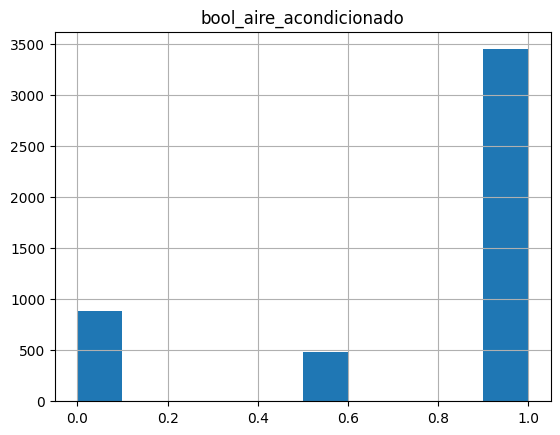

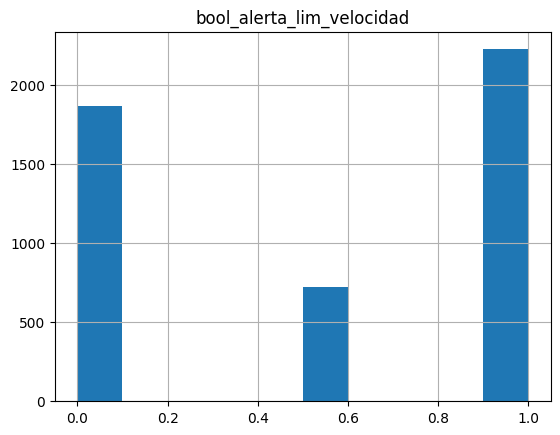

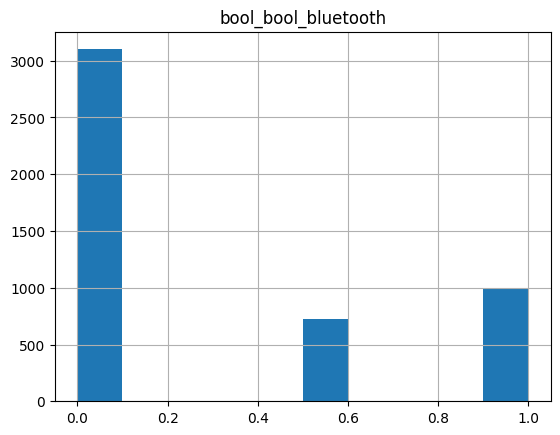

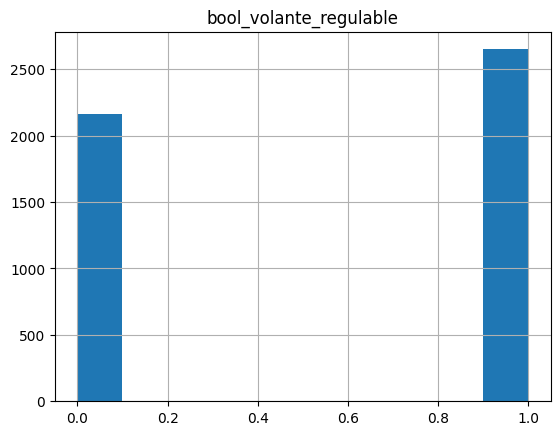

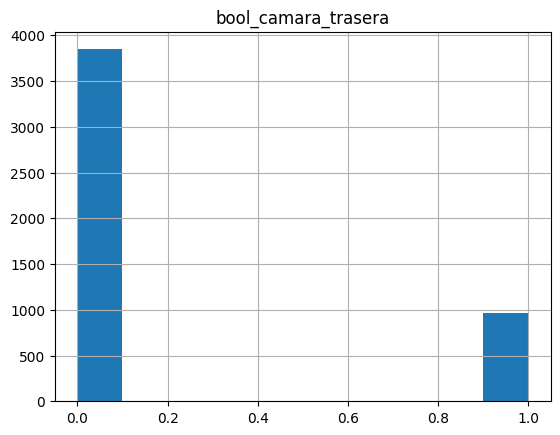

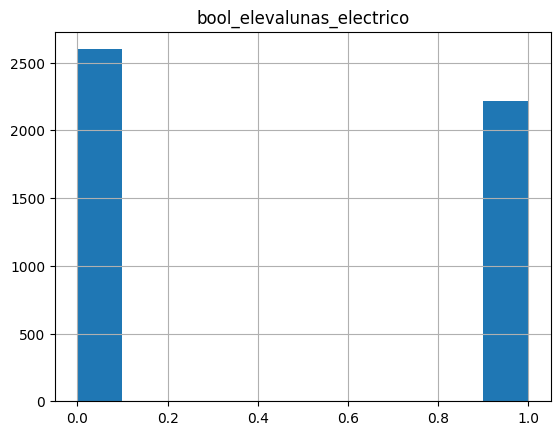

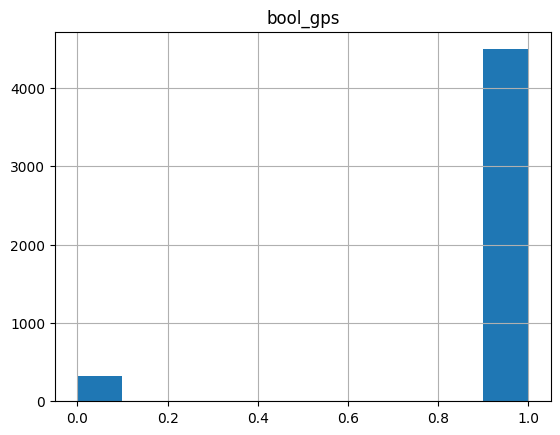

In [76]:
for i in l_bool:
  print(df_bmw4.hist(i))

In [77]:
for i in l_bool:
  print(df_bmw4[i].value_counts() / len(df_bmw4[i]) * 100)

bool_aire_acondicionado
1.0    71.600581
0.0    18.393191
0.5    10.006228
Name: count, dtype: float64
bool_alerta_lim_velocidad
1.0    46.211335
0.0    38.737804
0.5    15.050862
Name: count, dtype: float64
bool_bool_bluetooth
0.0    64.376168
1.0    20.572971
0.5    15.050862
Name: count, dtype: float64
bool_volante_regulable
1    55.034254
0    44.965746
Name: count, dtype: float64
bool_camara_trasera
0    79.862985
1    20.137015
Name: count, dtype: float64
bool_elevalunas_electrico
0    53.933984
1    46.066016
Name: count, dtype: float64
bool_gps
1    93.253062
0     6.746938
Name: count, dtype: float64


1.bool_gps 93% y 6%


Podemos ver en esta columna una gran concentración de uno de los valores, por lo que el resto no influirán mucho en el modelo, podemos eliminar esta columna

In [78]:
del df_bmw4['bool_gps']

In [79]:
df_bmw4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
0,118,140411.0,100.0,diesel,black,sin datos,11300.0,2012,2018,1.0,0.5,0.5,1,0,1,6
1,M4,13929.0,317.0,petrol,grey,otro_tipo,69700.0,2013,2018,1.0,1.0,1.0,1,0,0,5
2,320,183297.0,120.0,diesel,white,sin datos,10200.0,2012,2018,0.0,0.0,0.0,0,0,1,6
3,420,128035.0,135.0,diesel,otros_colores,otro_tipo,25100.0,2013,2018,1.0,0.5,1.0,1,0,1,5
4,425,97097.0,160.0,diesel,silver,sin datos,33400.0,2013,2018,1.0,1.0,1.0,1,0,0,5


##Datos numéricos


> *R: en la columna 'km' hemos encontrado outliers por encima del valor 0.4e+06, al ser pocos he decidido eliminarlos. Een potencia he encontrado otros por debajo de 50 y unos cuantos más por encima de 250 los cuales he sustituido por la mediana*



[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'año_registro'}>]]
[[<Axes: title={'center': 'año_venta'}>]]
[[<Axes: title={'center': 'dif_años'}>]]


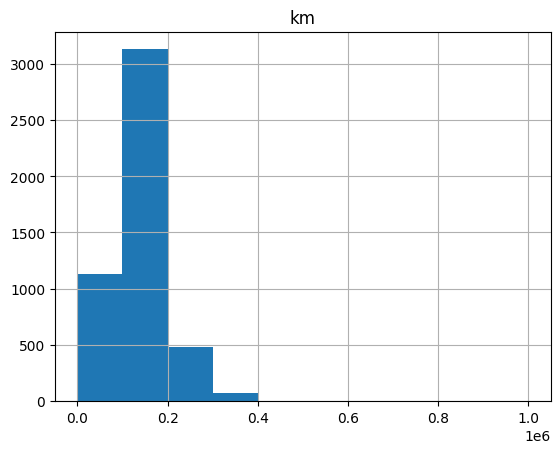

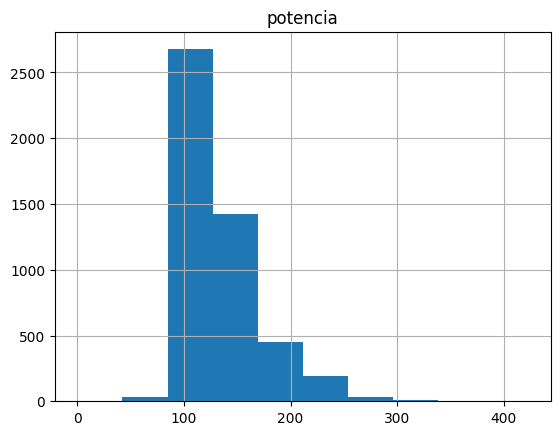

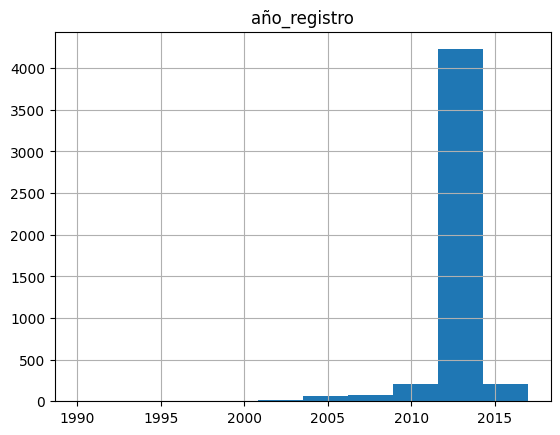

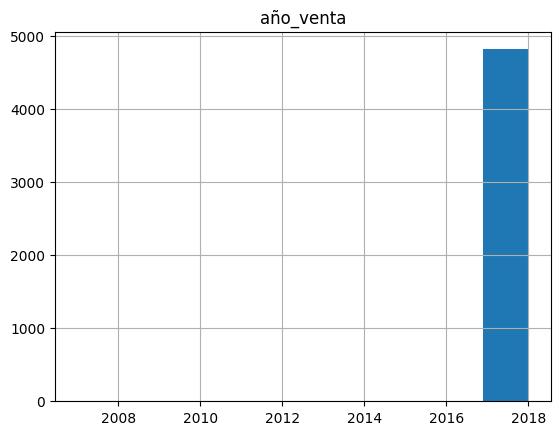

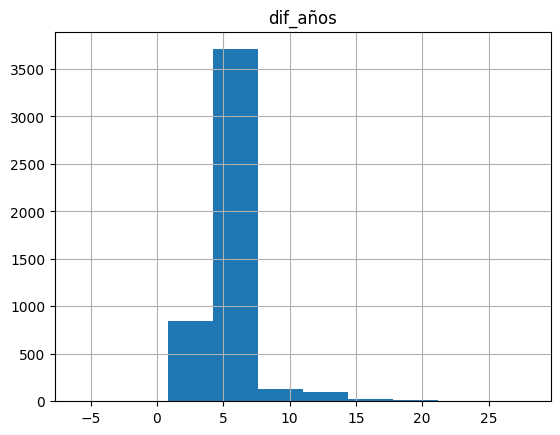

In [80]:
for i in l_num:
    print(df_bmw4.hist(i))

<Axes: xlabel='km'>

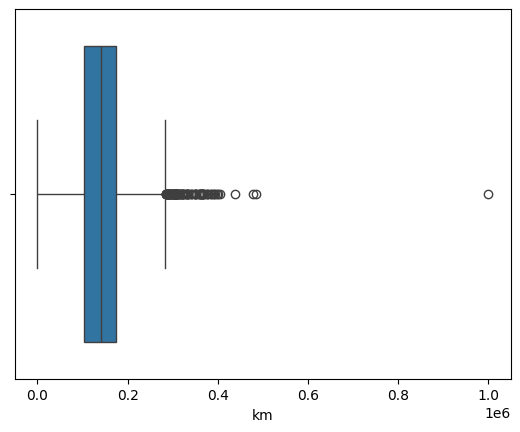

In [81]:
sns.boxplot(x=df_bmw4['km'])

In [82]:
df_bmw4[df_bmw4['km'] > (0.4e+06)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
557,520,484615.0,120.0,diesel,blue,estate,8300.0,2011,2018,1.0,0.0,0.5,1,0,0,7
1573,320,400654.0,110.0,diesel,black,estate,1800.0,2006,2018,0.0,0.0,0.0,0,1,0,12
2350,318,477571.0,85.0,diesel,grey,sin datos,1200.0,2013,2018,1.0,0.0,1.0,0,0,0,5
2829,525,439060.0,105.0,diesel,silver,sin datos,100.0,2013,2018,0.0,0.0,0.0,0,1,0,5
3198,320,405816.0,100.0,diesel,blue,sedan,500.0,2000,2018,0.0,0.0,0.5,0,0,0,18
3732,118,1000376.0,90.0,diesel,sin datos,sin datos,1400.0,2005,2018,0.0,0.0,0.5,1,0,0,13


In [83]:
df_bmw4['km'] = np.where(df_bmw4['km'] > (0.4e+06), df_bmw4['km'].median(), df_bmw4['km'])

<Axes: xlabel='potencia'>

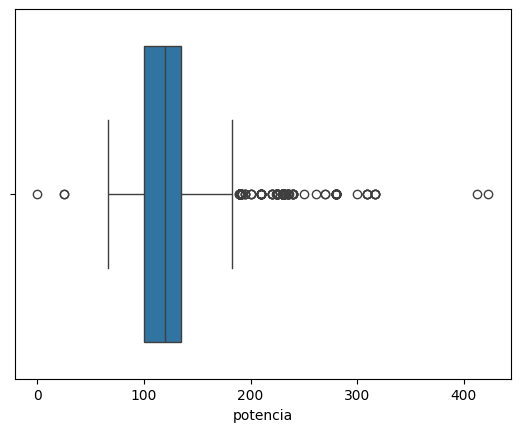

In [84]:
sns.boxplot(x=df_bmw4['potencia'])

In [85]:
df_bmw4[df_bmw4['potencia']<50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
1796,i3,152328.0,25.0,otras_gasolinas,black,sin datos,20300.0,2013,2018,1.0,0.5,0.0,0,0,0,5
1925,i3,152470.0,25.0,otras_gasolinas,black,hatchback,15500.0,2013,2018,1.0,1.0,0.0,0,0,0,5
3765,X1,81770.0,0.0,diesel,white,suv,11700.0,2014,2018,0.0,0.5,0.0,0,0,0,4


In [86]:
df_bmw4[df_bmw4['potencia']>250]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
1,M4,13929.0,317.0,petrol,grey,otro_tipo,69700.0,2013,2018,1.0,1.0,1.0,1,0,0,5
17,650,24521.0,270.0,petrol,grey,otro_tipo,9200.0,2013,2018,0.0,0.0,0.0,1,0,0,5
37,650,24452.0,270.0,petrol,grey,sin datos,6800.0,2013,2018,0.0,0.0,0.0,1,0,0,5
67,M3,29925.0,309.0,petrol,silver,sin datos,47000.0,2013,2018,1.0,1.0,1.0,1,0,1,5
72,M4,69410.0,317.0,petrol,white,sin datos,53600.0,2015,2018,1.0,1.0,1.0,1,0,0,3
73,M3,170550.0,309.0,petrol,grey,otro_tipo,28000.0,2013,2018,1.0,1.0,0.0,1,0,1,5
93,M3,99283.0,309.0,petrol,silver,sin datos,28600.0,2013,2018,0.0,1.0,0.0,0,0,1,5
139,M3,169970.0,309.0,petrol,grey,otro_tipo,35700.0,2011,2018,1.0,1.0,0.0,1,0,1,7
954,M550,184733.0,280.0,diesel,silver,sin datos,24800.0,2013,2018,1.0,1.0,1.0,1,0,1,5
967,M550,184507.0,280.0,diesel,silver,sin datos,26900.0,2013,2018,1.0,1.0,1.0,1,0,1,5


In [87]:
df_bmw4['potencia'] = np.where((df_bmw4['potencia']<50) | (df_bmw4['potencia']>250),
                         df_bmw4['potencia'].median(),
                         df_bmw4['potencia'])

##Fecha

> *R: vemos outliers en la diferencia de precio*



<Axes: >

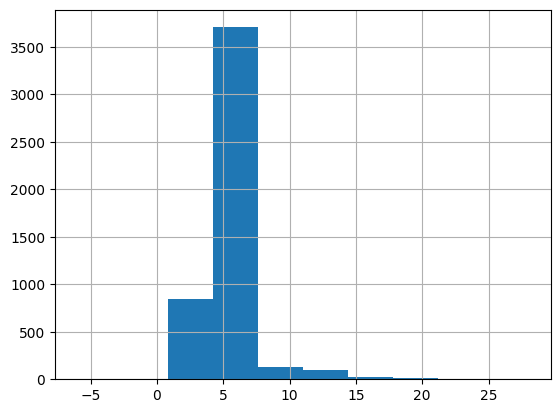

In [88]:
df_bmw4['dif_años'].hist()
 #no tiene sentido los valores entre el 1750 y 2000,
 #no puede ser tan antigüo son valores relacionados con los nulos, los sustituiremos por 0

In [89]:
(df_bmw4['dif_años'] <= 1000) | (df_bmw4['dif_años'] >= 0)

0       True
1       True
2       True
3       True
4       True
        ... 
4838    True
4839    True
4840    True
4841    True
4842    True
Name: dif_años, Length: 4817, dtype: bool

In [90]:
#creamos una variable sin los ouliers para hacer una media que no los incluya

media_dif_años = df_bmw4['dif_años'][(df_bmw4['dif_años'] <= 1000) | (df_bmw4['dif_años'] >= 0)].mean()

In [91]:
#también tenemos que tener en cuenta que los valores no pueden ser negativos

df_bmw4.loc[((df_bmw4['dif_años'] > 1000) | (df_bmw4['dif_años'] < 0)),'dif_años']  = media_dif_años

C:\Users\Silvia\AppData\Local\Temp\ipykernel_10100\1793946670.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.238115009341914' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_bmw4.loc[((df_bmw4['dif_años'] > 1000) | (df_bmw4['dif_años'] < 0)),'dif_años']  = media_dif_años


<Axes: >

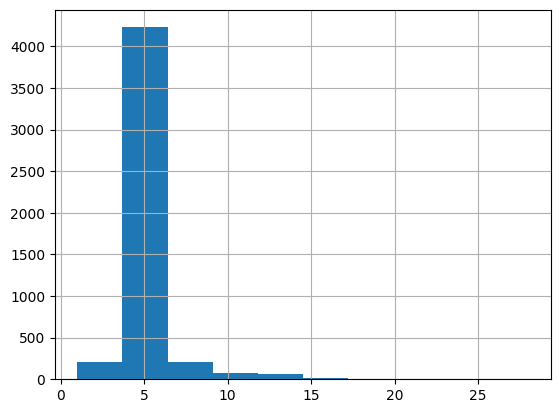

In [92]:
df_bmw4['dif_años'].hist()

# Paso 4 Análisis de correlación

Análisis de correlación inicial, ¿Hay alguna variable correlacionada?


> *El precio tiene un 0.75 de correlación con la potencia y un 0.41 con la alerta del límite de velocidad*



In [93]:
corr = df_bmw4.corr(numeric_only = True)

In [94]:
corr.style.background_gradient(cmap='Oranges')

,km,potencia,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
km,1.000000,-0.022908,-0.412071,-0.324859,-0.033865,0.018966,-0.028708,-0.027370,0.068841,0.001069,0.056484,0.324230
potencia,-0.022908,1.000000,0.575643,0.051720,-0.003159,0.182720,0.466705,0.195356,0.324953,0.311931,0.368350,-0.051767
precio,-0.412071,0.575643,1.000000,0.310450,0.013978,0.229366,0.411628,0.193180,0.267823,0.251620,0.260994,-0.310348
año_registro,-0.324859,0.051720,0.310450,1.000000,0.002808,0.146382,0.100341,0.035271,-0.037605,-0.017220,0.063905,-0.999893
año_venta,-0.033865,-0.003159,0.013978,0.002808,1.000000,-0.007465,0.001509,0.019841,-0.000132,0.014377,-0.002260,0.000123
bool_aire_acondicionado,0.018966,0.182720,0.229366,0.146382,-0.007465,1.000000,0.192913,0.110718,0.290900,0.130433,0.260549,-0.146506
bool_alerta_lim_velocidad,-0.028708,0.466705,0.411628,0.100341,0.001509,0.192913,1.000000,0.101907,0.201188,0.178357,0.316981,-0.100342
bool_bool_bluetooth,-0.027370,0.195356,0.193180,0.035271,0.019841,0.110718,0.101907,1.000000,0.125680,0.137178,0.236247,-0.035191
bool_volante_regulable,0.068841,0.324953,0.267823,-0.037605,-0.000132,0.290900,0.201188,0.125680,1.000000,0.253047,0.277784,0.037855
bool_camara_trasera,0.001069,0.311931,0.251620,-0.017220,0.014377,0.130433,0.178357,0.137178,0.253047,1.000000,0.198531,0.017283


# Paso 5 Análisis variable

Análisis variable vs target, ¿Hay algún insight interesante?

> *R: Parece haber una relación entre la potencia y el precio.Además las columnas boleanas(es decir las que describen si el coche tiene ciertas comodidades) y el precio también parecen tener una pequeña relación. Un insight bastante interesante parece ser la anigüedad del coche('dif_años') y el precio, aunque no podemos estar seguros ya que también parece que cuanta más antigüedad menos datos tenemos. Por otro lado el gráfico de km y precio también tienen una evidente relación inversamente proporcional.*


In [95]:
df_bmw5 = df_bmw4.copy()

<Axes: >

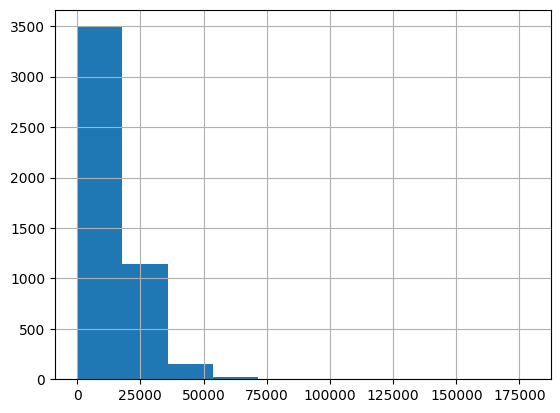

In [96]:
df_bmw5['precio'].hist()

<Axes: xlabel='precio'>

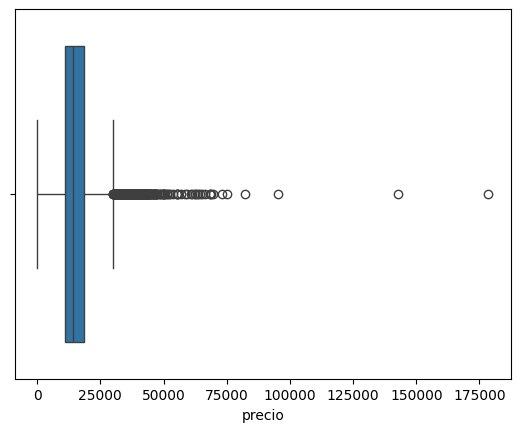

In [97]:
#Aunque nos salga que los precios entre 30000 y 50000 son outliers, considero que son precios posibles para una coche
sns.boxplot(x=df_bmw5['precio'])

In [98]:
#Es posible que estos datos sean ciertos,
#pero podrían perjudicar al modelo por lo que filtraremos que el precio máximo sea 80000

df_bmw5[df_bmw5['precio']>80000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
90,i8,12402.0,170.0,otras_gasolinas,grey,otro_tipo,95200.0,2013,2018,1.0,1.0,0.0,1,0,0,5.0
4146,X6 M,2970.0,120.0,petrol,otros_colores,suv,82400.0,2016,2018,0.5,1.0,0.0,1,1,0,2.0
4684,X4,103222.0,140.0,diesel,grey,suv,142800.0,2014,2018,1.0,1.0,0.0,1,0,1,4.0
4753,X3,72515.0,135.0,diesel,blue,suv,178500.0,2013,2018,0.0,1.0,0.5,0,1,0,5.0


In [99]:
df_bmw5[df_bmw5['precio']<700]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,bool_elevalunas_electrico,dif_años
537,320,302006.0,100.0,diesel,sin datos,estate,500.0,2013,2018,0.5,0.0,0.0,0,0,0,5.0
565,320,179358.0,120.0,diesel,black,sin datos,100.0,2013,2018,1.0,1.0,0.0,0,0,0,5.0
879,318,134156.0,105.0,diesel,grey,estate,100.0,2014,2018,1.0,1.0,0.0,0,0,0,4.0
1255,320,170381.0,135.0,diesel,silver,sin datos,100.0,2013,2018,1.0,0.0,0.0,1,0,0,5.0
1513,520,358332.0,100.0,diesel,blue,sin datos,400.0,2013,2018,0.0,0.0,0.0,0,0,1,5.0
1558,520,358333.0,100.0,diesel,blue,estate,400.0,2013,2018,0.0,0.5,0.5,0,0,1,5.0
1832,116,174524.0,85.0,diesel,blue,hatchback,100.0,2014,2018,1.0,0.5,0.0,0,0,0,4.0
2473,525,230578.0,85.0,diesel,sin datos,sedan,200.0,1997,2018,0.5,0.5,0.0,0,0,0,21.0
2574,525,229880.0,85.0,diesel,black,sedan,200.0,1997,2018,0.5,0.0,0.5,0,0,0,21.0
2611,525,230264.0,85.0,diesel,black,sedan,200.0,1997,2018,0.0,0.0,0.0,0,0,0,21.0


In [100]:
df_bmw5.drop(df_bmw5[((df_bmw5['precio']>80000) | (df_bmw5['precio']<700))].index, inplace = True)

In [101]:
df_bmw5['log_precio'] = np.log10(df_bmw5['precio'])

<Axes: >

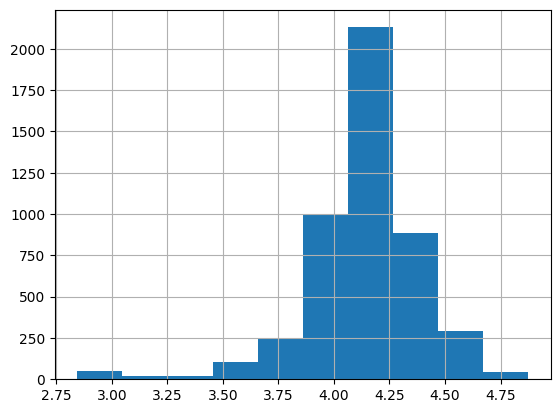

In [102]:
df_bmw5['log_precio'].hist()

<Axes: xlabel='log_precio'>

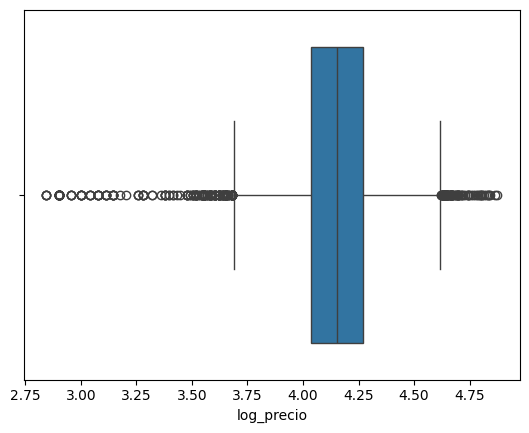

In [103]:
sns.boxplot(x=df_bmw5['log_precio'])

## modelo

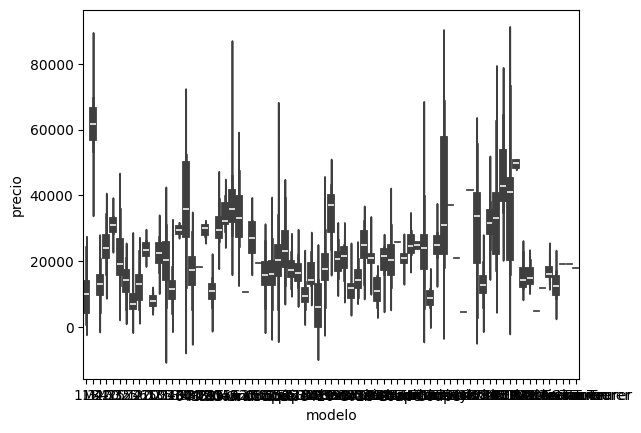

In [104]:
sns.violinplot(x='modelo', y='precio', data=df_bmw5);

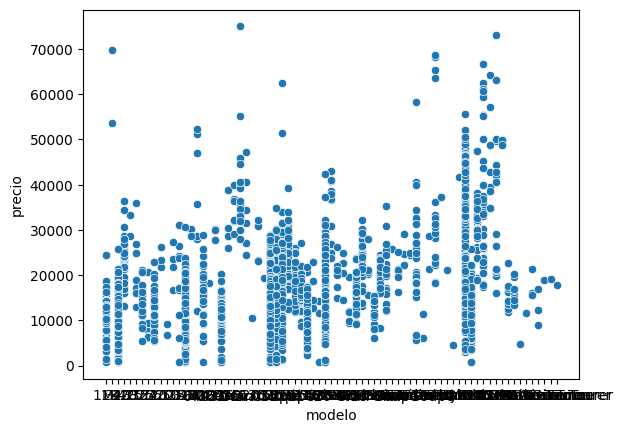

In [105]:
sns.scatterplot(x='modelo', y='precio', data=df_bmw5);

## km -

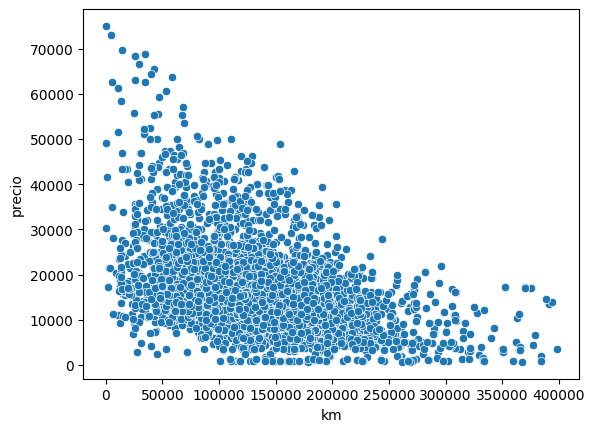

In [106]:
sns.scatterplot(x='km', y='precio',  data=df_bmw5);

## potencia -
parece haber una pequeña relación entre el crecimiento de la potencia y el crecimiento del precio

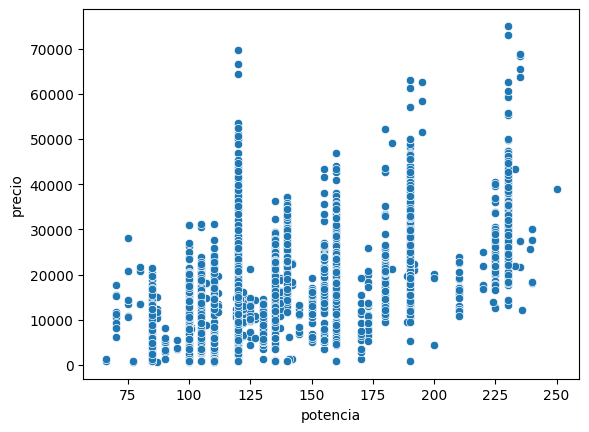

In [107]:
sns.scatterplot(x='potencia', y='precio', data=df_bmw5);

## tipo_gasolina

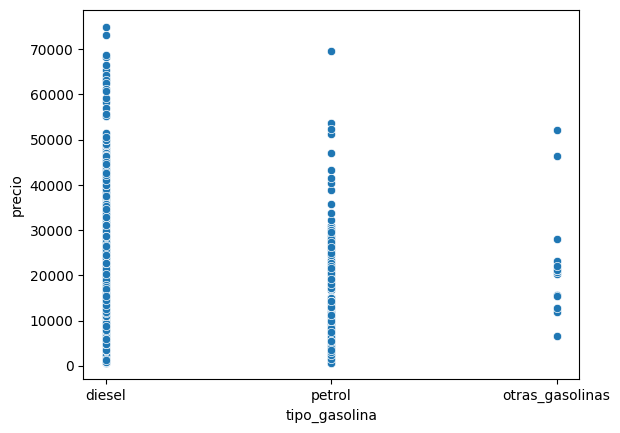

In [108]:
sns.scatterplot(x='tipo_gasolina', y='precio', data=df_bmw5);

## color

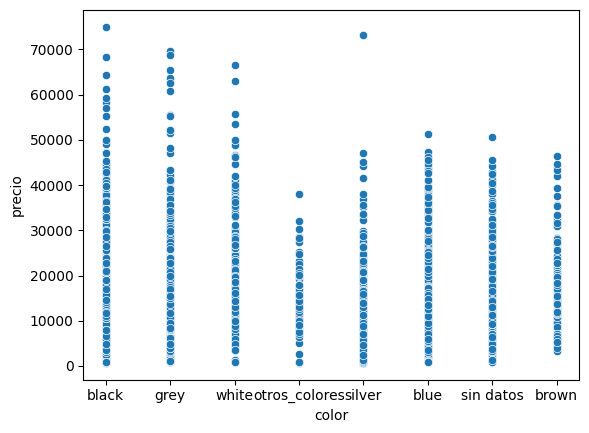

In [109]:
sns.scatterplot(x='color', y='precio', data=df_bmw5);

## tipo_coche

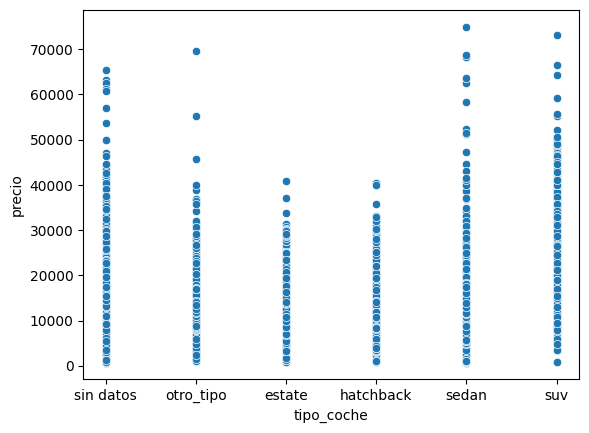

In [110]:
sns.scatterplot(x='tipo_coche', y='precio', data=df_bmw5);

## bool_aire_acondicionado -

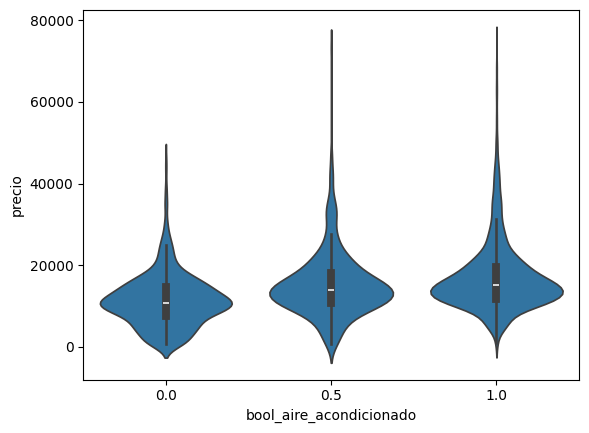

In [111]:
sns.violinplot(x='bool_aire_acondicionado', y='precio', data=df_bmw5);

## bool_alerta_lim_velocidad -

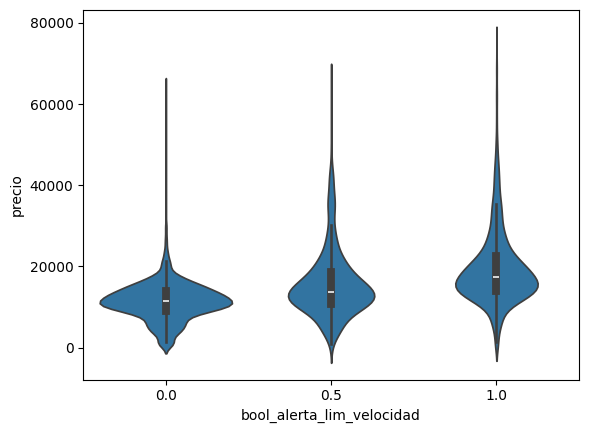

In [112]:
sns.violinplot(x='bool_alerta_lim_velocidad', y='precio', data=df_bmw5);

## bool_bool_bluetooth -

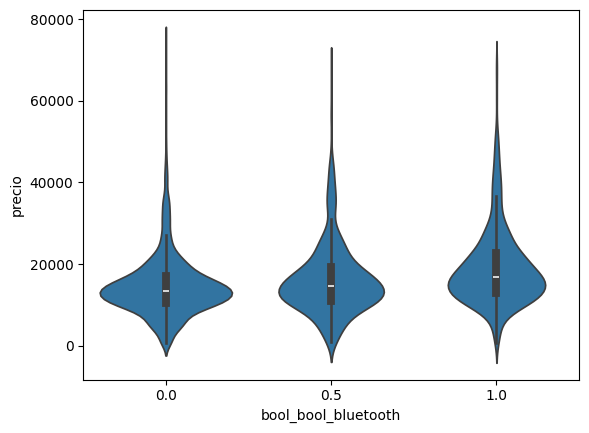

In [113]:
sns.violinplot(x='bool_bool_bluetooth', y='precio', data=df_bmw5);

## bool_volante_regulable -


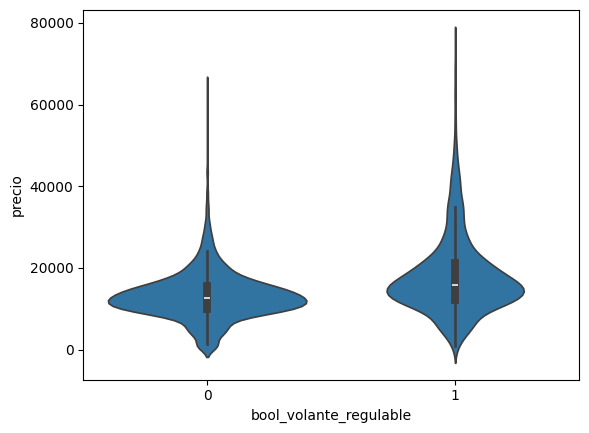

In [114]:
sns.violinplot(x='bool_volante_regulable', y='precio', data=df_bmw5);

## bool_camara_trasera -

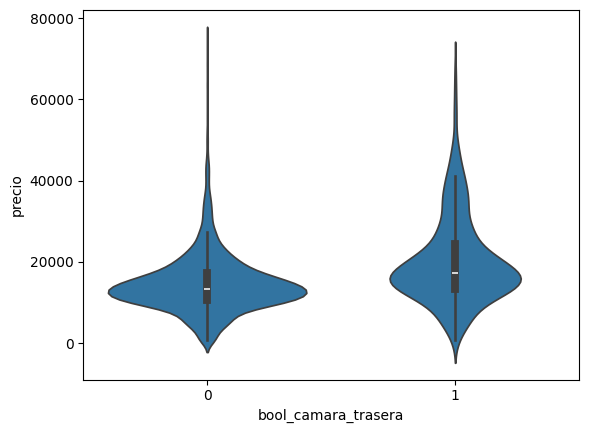

In [115]:
sns.violinplot(x='bool_camara_trasera', y='precio', data=df_bmw5);

## bool_elevalunas_electrico -

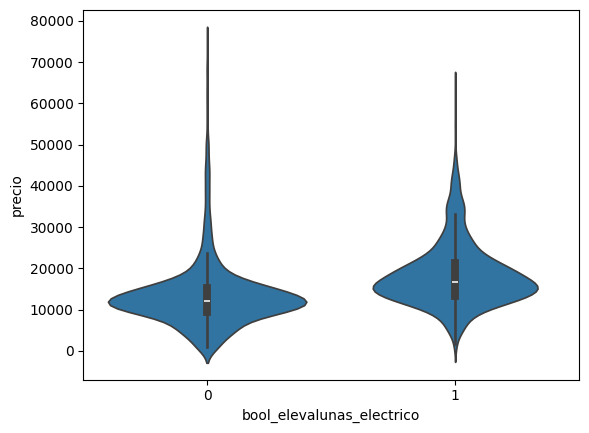

In [116]:
sns.violinplot(x='bool_elevalunas_electrico', y='precio', data=df_bmw5);

## año_registro, año_venta, dif_años -
Vemos clarmente que cuanto mayor es la diferencia de años, menor es el precio

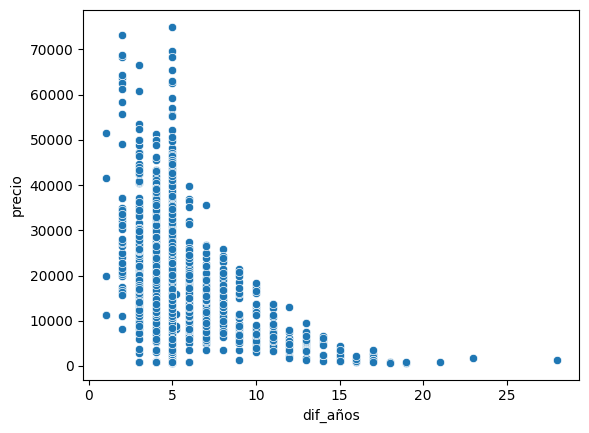

In [117]:
sns.scatterplot(x='dif_años', y='precio', data=df_bmw5);

# Paso 6 de categóricas a numéricas

Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar?

> *R: las variables categóricas que vamos a tranformar son: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche'] con el método One hot encoding*



## Paso 1

In [118]:
df_bmw6 = df_bmw5.copy()

In [119]:
target = ['precio', 'log_precio']

In [120]:
l_num2, l_bool2, l_cat2 = obtener_lista_variables(df_bmw6)

In [121]:
l_cat2

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [122]:
for i in l_cat2:
  print(i, df_bmw6[i].unique(), '\n')

modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 

tipo_gasolina ['diesel' 'petrol' 'otras_gasolinas'] 

color ['black' 'grey' 'white' 'otros_colores' 'silver' 'blue' 'sin datos'
 'brown'] 

tipo_coche ['sin datos' 'otro_tipo' 'estate' 'hatchback' 'sedan' 'suv'] 



## One hot encoding

In [123]:
df_bmw6 = pd.get_dummies(data=df_bmw6, columns = l_cat2)

In [124]:
df_bmw6.head()

,km,potencia,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,...,color_otros_colores,color_silver,color_sin datos,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_suv
0,140411.0,100.0,11300.0,2012,2018,1.0,0.5,0.5,1,0,...,False,False,False,False,False,False,False,False,True,False
1,13929.0,120.0,69700.0,2013,2018,1.0,1.0,1.0,1,0,...,False,False,False,False,False,False,True,False,False,False
2,183297.0,120.0,10200.0,2012,2018,0.0,0.0,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
3,128035.0,135.0,25100.0,2013,2018,1.0,0.5,1.0,1,0,...,True,False,False,False,False,False,True,False,False,False
4,97097.0,160.0,33400.0,2013,2018,1.0,1.0,1.0,1,0,...,False,True,False,False,False,False,False,False,True,False


# Paso 7 minmaxscaler

Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

> *R: El precio guarda una relación de -0.42, que sea negativa se debe a que cuantos más km menor es el precio. Además tiene un 0.46 con la alerta del límite de velocidad. Aunque lo que más relación tiene como llevamos viendo desdel principio es la potencia con un 0.61 de correlación. Por otro lado he podido comprobar que mi hipótesis inicial de que el precio tiene relación con la fecha/antigüedad es correcta, -0.32 de correlación cuantos más años de difernecia, más antigüedad por lo tanto el precio es menor*



In [125]:
df_bmw7 = df_bmw6.copy()

In [126]:
len(df_bmw)

4843

In [127]:
len(df_bmw7)

4796

In [128]:
minMaxResultado = MinMaxScaler()

In [129]:
l_num2

['km', 'potencia', 'año_registro', 'año_venta', 'dif_años']

In [130]:
df_bmw7[l_num2] = minMaxResultado.fit_transform(df_bmw7[l_num2])

In [131]:
df_bmw7.head()

,km,potencia,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,...,color_otros_colores,color_silver,color_sin datos,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_suv
0,0.352857,0.184783,11300.0,0.814815,1.0,1.0,0.5,0.5,1,0,...,False,False,False,False,False,False,False,False,True,False
1,0.035149,0.293478,69700.0,0.851852,1.0,1.0,1.0,1.0,1,0,...,False,False,False,False,False,False,True,False,False,False
2,0.460582,0.293478,10200.0,0.814815,1.0,0.0,0.0,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
3,0.321770,0.375000,25100.0,0.851852,1.0,1.0,0.5,1.0,1,0,...,True,False,False,False,False,False,True,False,False,False
4,0.244058,0.510870,33400.0,0.851852,1.0,1.0,1.0,1.0,1,0,...,False,True,False,False,False,False,False,False,True,False


In [132]:
corr2 = df_bmw7.corr(numeric_only = True)

In [133]:
corr2.style.background_gradient(cmap='coolwarm')

#Paso 8 Pickle

In [134]:
pd.to_pickle(df_bmw7, r'C:\Users\Silvia\Downloads\BMW data preparation project\bmw_final_PK')

In [135]:
df_bmw_recuperacion = pd.read_pickle(r"C:\Users\Silvia\Downloads\BMW data preparation project\bmw_final_PK")

In [136]:
df_bmw_recuperacion.head()

,km,potencia,precio,año_registro,año_venta,bool_aire_acondicionado,bool_alerta_lim_velocidad,bool_bool_bluetooth,bool_volante_regulable,bool_camara_trasera,...,color_otros_colores,color_silver,color_sin datos,color_white,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_otro_tipo,tipo_coche_sedan,tipo_coche_sin datos,tipo_coche_suv
0,0.352857,0.184783,11300.0,0.814815,1.0,1.0,0.5,0.5,1,0,...,False,False,False,False,False,False,False,False,True,False
1,0.035149,0.293478,69700.0,0.851852,1.0,1.0,1.0,1.0,1,0,...,False,False,False,False,False,False,True,False,False,False
2,0.460582,0.293478,10200.0,0.814815,1.0,0.0,0.0,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
3,0.321770,0.375000,25100.0,0.851852,1.0,1.0,0.5,1.0,1,0,...,True,False,False,False,False,False,True,False,False,False
4,0.244058,0.510870,33400.0,0.851852,1.0,1.0,1.0,1.0,1,0,...,False,True,False,False,False,False,False,False,True,False
